In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data  = pd.read_csv("banknotes.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [3]:
data.head(
)

,variance,skewness,curtosis,entropy,class
0,-0.89569,3.00250,-3.606700,-3.44570,1
1,3.47690,-0.15314,2.530000,2.44950,0
2,3.91020,6.06500,-2.453400,-0.68234,0
3,0.60731,3.95440,-4.772000,-4.48530,1
4,2.37180,7.49080,0.015989,-1.74140,0


In [4]:
X = data.drop(columns = ["class"])
y = data["class"]
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
dtypes: float64(4)
memory usage: 43.0 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1372 entries, 0 to 1371
Series name: class
Non-Null Count  Dtype
--------------  -----
1372 non-null   int64
dtypes: int64(1)
memory usage: 10.8 KB


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape, y_train.shape


((1097, 4), (1097,))

In [7]:
X_test.shape, y_test.shape

((275, 4), (275,))

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_out = knn.predict(X_test)

# gauss = GaussianNB()
# gauss.fit(X_train, y_train)
# y_out = gauss.predict(X_test)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_out))
print(classification_report(y_true=y_test, y_pred=y_out))

Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       130

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



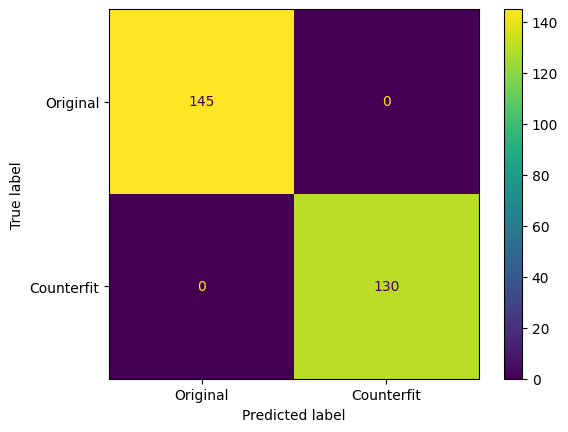

In [9]:
cm = confusion_matrix(y_true=y_test, y_pred=y_out)
cm_plot = ConfusionMatrixDisplay(
    cm, display_labels=['Original', 'Counterfit'])
cm_plot.plot()
plt.savefig('cm-bankNote.png')